In [138]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import json
import streamlit as st

In [139]:
# read dataset
filepath = "produksi_minyak_mentah.csv"
df = pd.read_csv(filepath)
print(df)

df_csv_clean = df.set_index("kode_negara")
df_csv_clean.head()

df_csv_clean = df_csv_clean.drop(["WLD","G20","OECD","OEU","EU28"])
df_csv_clean.reset_index(drop=False, inplace=True)

print(df_csv_clean)

     kode_negara  tahun   produksi
0            AUS   1971  14226.194
1            AUS   1972  15029.094
2            AUS   1973  18720.577
3            AUS   1974  18498.696
4            AUS   1975  19736.070
...          ...    ...        ...
5834         ZWE   2011      0.000
5835         ZWE   2012      0.000
5836         ZWE   2013      0.000
5837         ZWE   2014      0.000
5838         ZWE   2015      0.000

[5839 rows x 3 columns]
     kode_negara  tahun   produksi
0            AUS   1971  14226.194
1            AUS   1972  15029.094
2            AUS   1973  18720.577
3            AUS   1974  18498.696
4            AUS   1975  19736.070
...          ...    ...        ...
5628         ZWE   2011      0.000
5629         ZWE   2012      0.000
5630         ZWE   2013      0.000
5631         ZWE   2014      0.000
5632         ZWE   2015      0.000

[5633 rows x 3 columns]


In [141]:
listkodecsv = []

for i in list(df['kode_negara']):
    if i not in listkodecsv:
        listkodecsv.append(i)

namajson = "kode_negara_lengkap.json"
openjson = open(namajson)
loadjson = json.load(openjson)

list_kode_bersih = []
for i in loadjson :
    A = i.get('alpha-3')
    list_kode_bersih.append(A)
    if A not in listkodecsv:
        list_kode_bersih.remove(A)

print(list_kode_bersih)
print(len(list_kode_bersih))

['ALB', 'DZA', 'AGO', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BHR', 'BGD', 'BLR', 'BEL', 'BEN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'KHM', 'CMR', 'CAN', 'CHL', 'CHN', 'COL', 'COG', 'COD', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'DNK', 'DOM', 'ECU', 'EGY', 'SLV', 'ERI', 'EST', 'ETH', 'FIN', 'FRA', 'GAB', 'GEO', 'DEU', 'GHA', 'GRC', 'GTM', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'PRK', 'KOR', 'KWT', 'KGZ', 'LVA', 'LBN', 'LBY', 'LTU', 'LUX', 'MYS', 'MLT', 'MEX', 'MDA', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA', 'MKD', 'NOR', 'OMN', 'PAK', 'PAN', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'QAT', 'ROU', 'RUS', 'SAU', 'SEN', 'SRB', 'SGP', 'SVK', 'SVN', 'ZAF', 'ESP', 'LKA', 'SDN', 'SWE', 'CHE', 'SYR', 'TWN', 'TJK', 'TZA', 'THA', 'TGO', 'TTO', 'TUN', 'TUR', 'TKM', 'UKR', 'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VEN', 'VNM', 'YEM', 'ZMB', 'ZWE']
137


In [6]:
df_json = pd.read_json(namajson)

listnama = []
listkodenegara = []
listregion = []
listsubregion = []

for i in range(len(listkodecsv)):
    for j in range(len(list(df_json['alpha-3']))):
        if list(df_json['alpha-3'])[j] == listkodecsv[i] and list(df_json['name'])[j] not in listnama:
            listnama.append(list(df_json['name'])[j])
            listkodenegara.append(list(df_json['country-code'])[j])
            listregion.append(list(df_json['region'])[j])
            listsubregion.append(list(df_json['sub-region'])[j])

df_json_clean = pd.DataFrame(list(zip(listnama, listkodecsv, listkodenegara, listregion, listsubregion)), columns=['NamaNegara', 'ISO3', 'KodeNegara', 'Region', 'SubRegion'])

df_json_clean

,NamaNegara,ISO3,KodeNegara,Region,SubRegion
0,Australia,AUS,36,Oceania,Australia and New Zealand
1,Austria,AUT,40,Europe,Western Europe
2,Belgium,BEL,56,Europe,Western Europe
3,Canada,CAN,124,Americas,Northern America
4,Czechia,CZE,203,Europe,Eastern Europe
...,...,...,...,...,...
132,Turkmenistan,SYR,795,Asia,Central Asia
133,Uzbekistan,TJK,860,Asia,Central Asia
134,Venezuela (Bolivarian Republic of),TGO,862,Americas,Latin America and the Caribbean
135,Yemen,TTO,887,Asia,Western Asia


<function matplotlib.pyplot.show(close=None, block=None)>

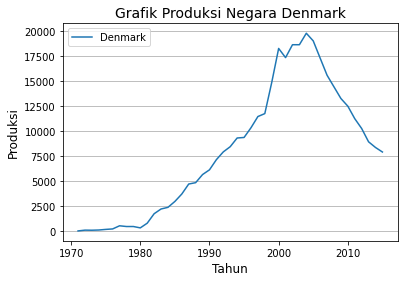

In [21]:
# 1 A

#N = st.selectbox("Daftar Negara", listnama)
N = input("Masukkan nama negara: ")
N = N.capitalize()

for i in range(len(listnama)):
    if listnama[i] == N:
        kodenegarahuruf = listkodecsv[i]
        kodenegaraangka = listkodenegara[i]
        region = listregion[i]
        subregion = listsubregion[i]

# Membuat list baru untuk menampung data produksi negara dan tahunnya
grafik1_produksi = []
grafik1_tahun = []

# Mengambil data produksi dan tahun berdasarkan negara yang dipilih pada
# option dan memasukkannya ke list yang telah dibuat
for i in range(len(list(df['kode_negara']))):
    if kodenegarahuruf == list(df['kode_negara'])[i]:
        grafik1_tahun.append(list(df['tahun'])[i])
        grafik1_produksi.append(list(df['produksi'])[i])

fig, ax = plt.subplots()
plt.plot(grafik1_tahun, grafik1_produksi)
plt.title('Grafik Produksi Negara ' + N, fontsize = 14)
plt.legend([N])
plt.xlabel('Tahun', fontsize = 12)
plt.ylabel('Produksi', fontsize = 12)
plt.grid(axis='y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

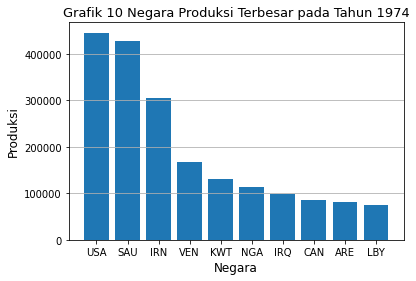

In [147]:
#1 B

T = int(input("Masukkan tahun: "))
B1 = int(input("Berapa negara?"))

dftahun = df_csv_clean.loc[df_csv_clean['tahun'] == T].sort_values(by=['produksi'], ascending=False)
dftahun = dftahun[:B1]

negara2 = dftahun['kode_negara']
produksi2 = dftahun['produksi']
fig, ax = plt.subplots()
plt.bar(negara2, produksi2)
plt.title('Grafik ' + str(B1) + ' Negara Produksi Terbesar pada Tahun ' + str(T), fontsize = 13)
plt.xlabel('Negara', fontsize = 12)
plt.ylabel('Produksi', fontsize = 12)
plt.grid(axis='y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

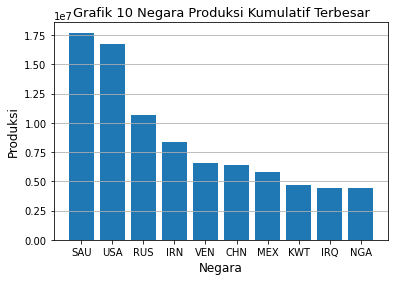

In [38]:
# Membuat list baru untuk menampung data produksi minyak kumulatif tiap negara
list_sum = []

B2 = int(input("Berapa negara?"))

# Menjumlahkan produksi minyak tiap negara dan memasukkannya ke list_sum
for i in list_kode_bersih:
    a = df_csv_clean.loc[df_csv_clean['kode_negara'] == i, 'produksi'].sum()
    list_sum.append(a)

# Membuat dataframe baru dan diurutkan berdasarkan produksi kumulatif
# minyak terbesar
df3 = pd.DataFrame(list(zip(listkodecsv, list_sum)), columns=['kode_negara', 'produksi_kumulatif']).sort_values(by=['produksi_kumulatif'], ascending=False)
df3 = df3 [:B2]

negara3 = df3['kode_negara']
produksikumul3 = df3['produksi_kumulatif']

fig, ax = plt.subplots()
plt.bar(negara3, produksikumul3)
plt.title('Grafik ' + str(B1) + ' Negara Produksi Kumulatif Terbesar', fontsize = 13)
plt.xlabel('Negara', fontsize = 12)
plt.ylabel('Produksi', fontsize = 12)
plt.grid(axis='y')
plt.show

#B2 = int(opt3.number_input("Banyak Negara", min_value=1, max_value=len(df3), key="kumulatif"))

In [136]:
dfsummary = pd.DataFrame(list(zip(listkodecsv, list_sum)), columns=['kode_negara', 'produksi_kumulatif']).sort_values(by=['produksi_kumulatif'], ascending=False)

df_summary_clean = dfsummary.set_index("produksi_kumulatif")
df_summary_clean.head()
df_summary_clean = df_summary_clean.drop([0])
df_summary_clean.reset_index(drop=False, inplace=True)

print("Produksi Terbesar:")
print(df_summary_clean.iloc[0]['kode_negara'])
print(df_summary_clean.iloc[0]['produksi_kumulatif'])

print("\nProduksi Terkecil:")
print(df_summary_clean.iloc[len(df_summary_clean)-1]['kode_negara'])
print(df_summary_clean.iloc[len(df_summary_clean)-1]['produksi_kumulatif'])

df_summary_bersih = pd.DataFrame(list(zip(listkodecsv, list_sum)), columns=['kode_negara', 'produksi_kumulatif']).sort_values(by=['produksi_kumulatif'], ascending=False)
df_summary_bersih = df_summary_bersih.set_index("kode_negara")
df_summary_bersih.head()
df_summary_bersih = df_summary_bersih.drop(["WLD","G20","OECD","OEU","EU28"])
df_summary_bersih.reset_index(drop=False, inplace=True)


print("\nProduksi Sama Dengan Nol:")
negaranol = df_summary_bersih.iloc[len(df_summary_clean):len(dfsummary)]['kode_negara']
produksinol = df_summary_bersih.iloc[len(df_summary_clean):len(dfsummary)]['produksi_kumulatif']

dfnol = pd.DataFrame(list(zip(negaranol, produksinol)), columns=['kode_negara', 'produksi_kumulatif'])
print(dfnol)

Produksi Terbesar:
SAU
17711766.321000002

Produksi Terkecil:
SEN
17.306

Produksi Sama Dengan Nol:
   kode_negara  produksi_kumulatif
0          CHE                 0.0
1          NAM                 0.0
2          LBN                 0.0
3          KEN                 0.0
4          PRY                 0.0
5          NPL                 0.0
6          NIC                 0.0
7          PRT                 0.0
8          PAN                 0.0
9          JAM                 0.0
10         LKA                 0.0
11         TGO                 0.0
12         IRL                 0.0
13         ISL                 0.0
14         FIN                 0.0
15         BEL                 0.0
16         LUX                 0.0
17         ERI                 0.0
18         HND                 0.0
19         TZA                 0.0
20         MLT                 0.0
21         MKD                 0.0
22         URY                 0.0
23         ZMB                 0.0
24         LVA           

In [42]:
'''def return_namanegara(kodenegara):
    for key, value in negara_dictionary.items():
        if key==kodenegara:
            return value
    return('Value Not Found')'''

print("Summary")
max_produksi = np.asarray(list_sum).max()
max_produksi_idx = np.asarray(list_sum).argmax()
kodenegaramax = kodenegara[max_produksi_idx]
print(f"Jumlah Produksi Terbesar: \n" + f", {kodenegara[max_produksi_idx]}, ({max_produksi} TMT)")

'''DataBaru = [data for data in list_sum if data > 0]
min_produksi = np.asarray(DataBaru).min()
min_produksi_idx = np.asarray(DataBaru).argmin()
kodenegaramin = kodenegara[min_produksi_idx]
print(f"\nJumlah produksi Terkecil: \n" + f", {kodenegara[min_produksi_idx]}, ({min_produksi} TMT)")

nol_produksi = np.asarray(list_sum).min()
nol_produksi_idx = np.asarray(list_sum).argmin()
kodenegaranol = kodenegara[nol_produksi_idx]
print(f"\nJumlah produksi sama dengan nol: \n" + f", {kodenegara[nol_produksi_idx]}, ({nol_produksi} TMT)")'''

Summary


IndexError: string index out of range

In [44]:
tulis_kode = []
for i, kode in enumerate(kodenegara):
    tulis_kode.append(f"{str(i+1)}. {kode}\n")
tulis_kode = ' '.join(map(str, tulis_kode))
tulis_kode

total_tahun = []
for kode in kodenegara:
    jumlah_tahun = df[df['kode_negara']==kode].shape[0]
    total_tahun.append(jumlah_tahun)
print(f"Total tahun: {total_tahun}")

Total tahun: [0, 0, 0]


In [137]:
kodenegara = list(list_kode_bersih)
print(f"Kode Negara: {kodenegara}")

jumlah_produksi = []
for kode in kodenegara:
    produksi_minyak = df[df['kode_negara']==kode]['produksi'].unique()
    jumlah_produksi.append(produksi_minyak.sum())
print(f"Total Produksi: {jumlah_produksi}")

Kode Negara: ['ALB', 'DZA', 'AGO', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BHR', 'BGD', 'BLR', 'BEL', 'BEN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'KHM', 'CMR', 'CAN', 'CHL', 'CHN', 'COL', 'COG', 'COD', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'DNK', 'DOM', 'ECU', 'EGY', 'SLV', 'ERI', 'EST', 'ETH', 'FIN', 'FRA', 'GAB', 'GEO', 'DEU', 'GHA', 'GRC', 'GTM', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'PRK', 'KOR', 'KWT', 'KGZ', 'LVA', 'LBN', 'LBY', 'LTU', 'LUX', 'MYS', 'MLT', 'MEX', 'MDA', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA', 'MKD', 'NOR', 'OMN', 'PAK', 'PAN', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'QAT', 'ROU', 'RUS', 'SAU', 'SEN', 'SRB', 'SGP', 'SVK', 'SVN', 'ZAF', 'ESP', 'LKA', 'SDN', 'SWE', 'CHE', 'SYR', 'TWN', 'TJK', 'TZA', 'THA', 'TGO', 'TTO', 'TUN', 'TUR', 'TKM', 'UKR', 'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VEN', 'VNM', 'YEM', 'ZMB', 'ZWE']
Total Produksi: [41648.0, 2